# Trabajo semanal 8
## MAI - Filtros digitales
***Juan Costa Suárez***

---

![imagen](img/Circuito.jpg)


### Enunciado:
1) Obtener la transferencia de tensión fracción V subíndice o entre V subíndice i por método de cuadripolos (se sugiere referirse a alguno de los métodos de interconexión ya vistos). Ayuda: si C subíndice 2 igual fracción 4 entre 3 (se utilizó 1.333 para la simulación), los polos de la transferencia están ubicados sobre una circunferencia de radio unitario.

2) Valide la transferencia con simulación circuital.

3) Construya la matriz de admitancia indefinida (MAI) del circuito

4) Compute la transferencia de tensión con la MAI




In [1]:
from IPython.display import IFrame
IFrame("img/Circuito.jpg", width=600, height=300)

# Punto 1 y 2:

In [2]:
from IPython.display import IFrame
IFrame("pdf/Análisis_Cuadripolos.pdf", width=600, height=800)

In [2]:
# módulos genericos
import numpy as np
from scipy import signal as sig
from splane import analyze_sys, pretty_print_bicuad_omegayq


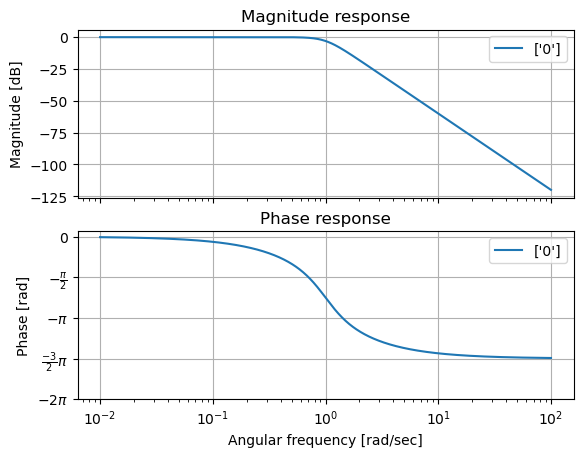

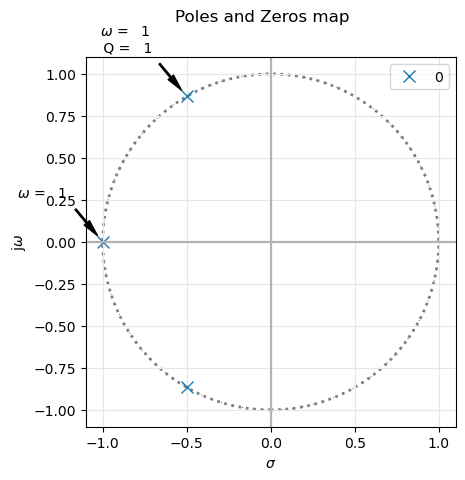

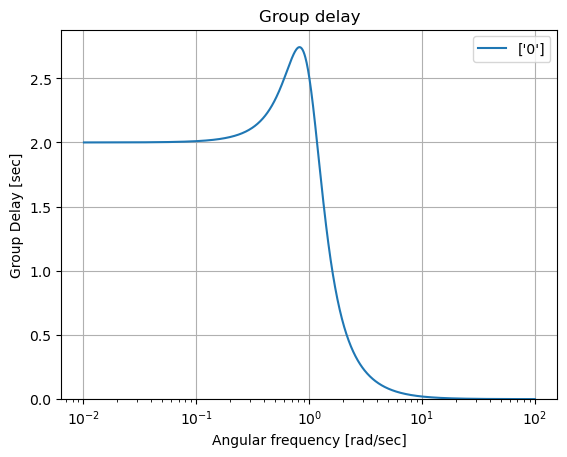

In [3]:
### SIMULACIÓN NUMÉRCIA###

num = np.array(1) 
den = np.array([1,2,2,1])
    
mi_sos = sig.TransferFunction(num,den)
analyze_sys(mi_sos)

## Simulación en LTSpice

Con esto podemos observar que cumplimos con la condición de tener los polos sobre la circunferencia de radio 1. Ahora vamos a realizar la simulación de LTSpice para corroborar los resultados.

---

![imagen](img/Circuito_Spice.jpg)

![imagen](img/Circuito_Spice_Simulación.jpg)

---

## Conclusiónes de la simulación:
Esta respuesta en frecuencia nos advierte que tenemos una transferencia de ganancia unitaria, que tenemos una pendiente de 60dB por década y que tenemos 3dB de caída en la frecuencia de corte. Por lo que podemos intuir que la transferencia es de un filtro Butterworth de orden 3. Con lo cual la transferencia que hallamos es correcta.


In [5]:
from IPython.display import IFrame
IFrame("img/Circuito_Spice.jpg", width=800, height=400)

In [6]:
IFrame("img/Circuito_Spice_Simulación.jpg", width=1200, height=800)


# Punto 3 y 4 MAI

In [7]:
from IPython.display import IFrame
IFrame("pdf/Análisis_Matricial.pdf", width=600, height=800)

## Resuelvo el resto en código:

In [8]:
from sympy import symbols, cancel, pprint, latex
from sympy import MatrixSymbol, Matrix

from sympy.solvers.solveset import linsolve
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot

s,ya,yb,yc,yo = symbols('s ya yb yc yo')

y_sum = ya + yb + yc

y11 = ya - ya**2/y_sum

Y1 =  Matrix([[ya,0,0], [0,yc+yo,-yo],[0,-yo,yo+yb]])
Y2 =  Matrix([[ya**2,ya*yc,ya*yb], [yc*ya,yc**2,yc*yb],[yb*ya,yb*yc,yb**2]]) /(ya+yb+yc)

MAI = Y1 - Y2

MAI= MAI.subs({ya:2/(3*s), yb: s*4/3, yc:2/s, yo:1})

pprint(cancel(MAI))



⎡    2                                          ⎤
⎢ 2⋅s  + 3          -1                -2⋅s      ⎥
⎢──────────       ────────           ────────   ⎥
⎢   3              3                    2       ⎥
⎢3⋅s  + 6⋅s       s  + 2⋅s           3⋅s  + 6   ⎥
⎢                                               ⎥
⎢             3      2               2          ⎥
⎢   -1       s  + 2⋅s  + 2⋅s + 1  - s  - 2⋅s - 2⎥
⎢ ────────   ───────────────────  ──────────────⎥
⎢  3                3                  2        ⎥
⎢ s  + 2⋅s         s  + 2⋅s           s  + 2    ⎥
⎢                                               ⎥
⎢                 2                  2          ⎥
⎢  -2⋅s        - s  - 2⋅s - 2     3⋅s  + 8⋅s + 6⎥
⎢ ────────     ──────────────     ──────────────⎥
⎢    2              2                   2       ⎥
⎣ 3⋅s  + 6         s  + 2            3⋅s  + 6   ⎦


         1         
───────────────────
 3      2          
s  + 2⋅s  + 2⋅s + 1


Transference(H(s)): 
         1         
───────────────────
 3      2          
s  + 2⋅s  + 2⋅s + 1




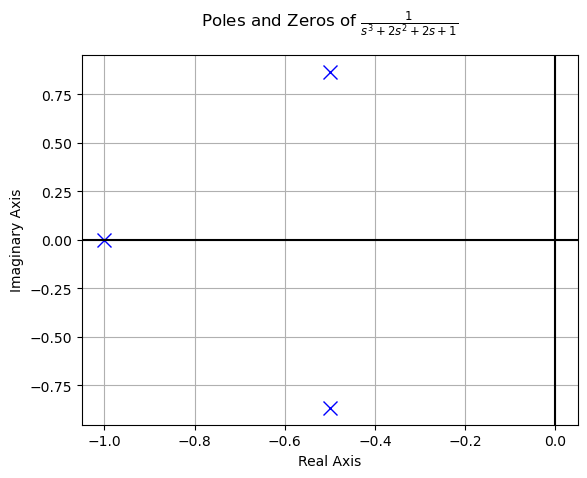

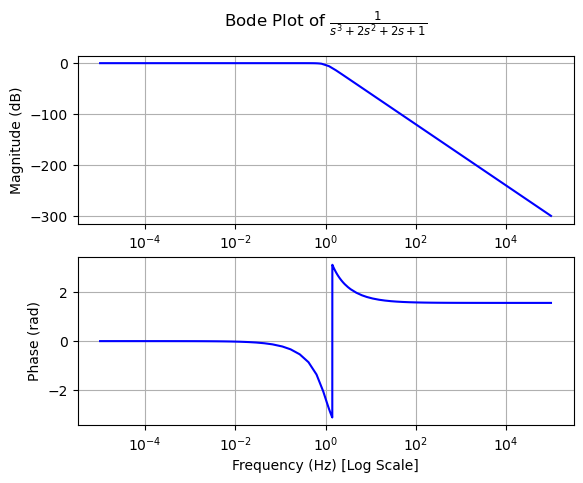

In [9]:
H=-MAI[1,0]/MAI[1,1]

H = cancel(H)

pprint(H)

Transf = TransferFunction.from_rational_expression(H,var =s)

print()
print()
print("Transference(H(s)): ")
pprint(Transf) # I

print()
print()
pole_zero_plot(Transf)

print()
print()
bode_plot(Transf)  


# Segunda parte

Resolución en papel y luego corroborado en código.


In [10]:
from IPython.display import IFrame
IFrame("pdf/TC_tp5_12.pdf", width=800, height=400)

## TP5.2
Se desea emular digitalmente la característica de un filtro analógico pasa bajos Butterworth de
orden 2, con f = 1 kHz.

A)  Para $f_s=100KHz$ y aplicando transformación bilineal, obtener un filtro con respuesta $H(z)$ cuyo comportamiento emule al Butterworth analógico.
Trazar la respuesta en frecuencia de módulo y fase de ambos filtros sobre un mismo gráfico para establecer comparaciones.

B)Repetir el punto anterior para f = 10 kHz.

C)Repetir los puntos A) y B) si se desea emular digitalmente la característica de un filtro analógico pasa altos Butterworth de orden 2, con f = 6 kHz

D)Indique en cuál de los 3 casos ( A, B ó C ) justificaría rediseñar aplicando prewarping. Explique el motivo en pocas palabras.

Teniendo en cuenta que son filtros pasabajos(en los cuales solo importa mantener la banda plana), los 3 filtros son correctos y cumplen su propósito de mantener la banda plana. Los efectos de prewarping son más visibles en filtros pasa altos y pasabanda en los cuales las frecuencias de importancia están cerca de la frecuencia de Nyquist.

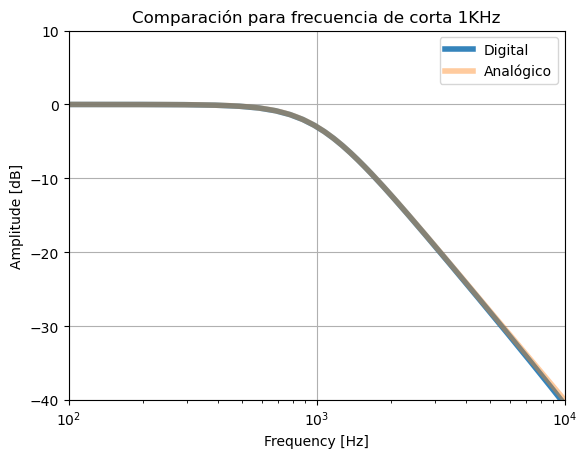

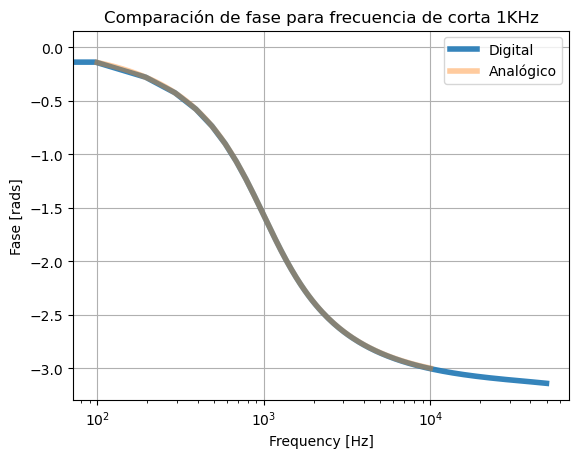

In [10]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

fs = 100E3
fc = 1E3
order = 2

plt.figure()
b, a  = signal.butter(order, fc, 'lp',  fs=fs,output='ba', analog=False)
w_digital, h_digital = signal.freqz(b, a, fs=fs)
plt.semilogx(w_digital, 20 * np.log10(abs(h_digital)),label='Digital', linewidth=4, alpha=0.9)

b, a  = signal.butter(order, fc, 'lp',output='ba', analog=True)
w_analog, h_analog = signal.freqs(b, a)
plt.semilogx(w_analog, 20 * np.log10(abs(h_analog)),label='Analógico', linewidth=4, alpha=0.4)

plt.xlim(fc/10, fc*10)     # set the xlim to left, right
plt.ylim(-40,10)     # set the xlim to left, right

plt.title('Comparación para frecuencia de corta 1KHz')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.legend()
plt.grid()

plt.show()

# Plot de ángulos

plt.figure()

plt.semilogx(w_digital, np.angle(h_digital),label='Digital', linewidth=4, alpha=0.9)
plt.semilogx(w_analog, np.angle(h_analog),label='Analógico', linewidth=4, alpha=0.4)

plt.title('Comparación de fase para frecuencia de corta 1KHz')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Fase [rads]')
plt.legend()
plt.grid()

plt.show()



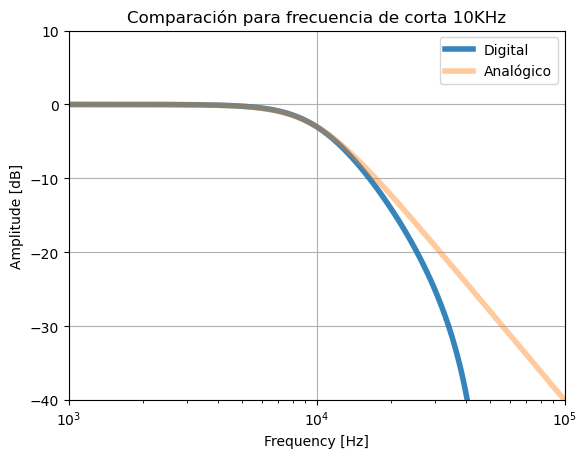

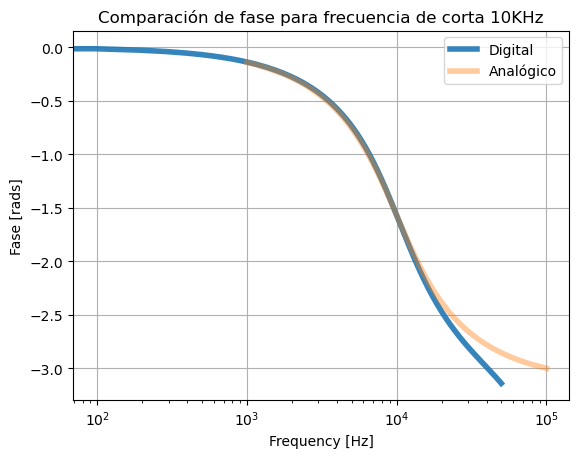

In [6]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

fs = 100E3
fc = 10E3
order = 2

plt.figure()
b, a  = signal.butter(order, fc, 'lp',  fs=fs,output='ba', analog=False)
w_digital, h_digital = signal.freqz(b, a, fs=fs)
plt.semilogx(w_digital, 20 * np.log10(abs(h_digital)),label='Digital', linewidth=4, alpha=0.9)

b, a  = signal.butter(order, fc, 'lp',output='ba', analog=True)
w_analog, h_analog = signal.freqs(b, a)
plt.semilogx(w_analog, 20 * np.log10(abs(h_analog)),label='Analógico', linewidth=4, alpha=0.4)

plt.xlim(fc/10, fc*10)     # set the xlim to left, right
plt.ylim(-40,10)     # set the xlim to left, right

plt.title('Comparación para frecuencia de corta 10KHz')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.legend()
plt.grid()

plt.show()

# Plot de ángulos

plt.figure()

plt.semilogx(w_digital, np.angle(h_digital),label='Digital', linewidth=4, alpha=0.9)
plt.semilogx(w_analog, np.angle(h_analog),label='Analógico', linewidth=4, alpha=0.4)

plt.title('Comparación de fase para frecuencia de corta 10KHz')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Fase [rads]')
plt.legend()
plt.grid()

plt.show()


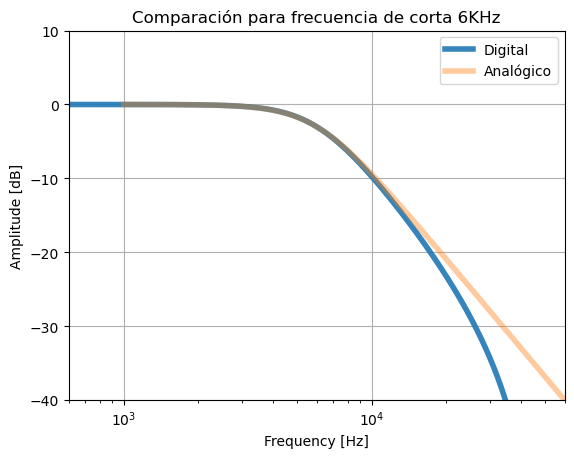

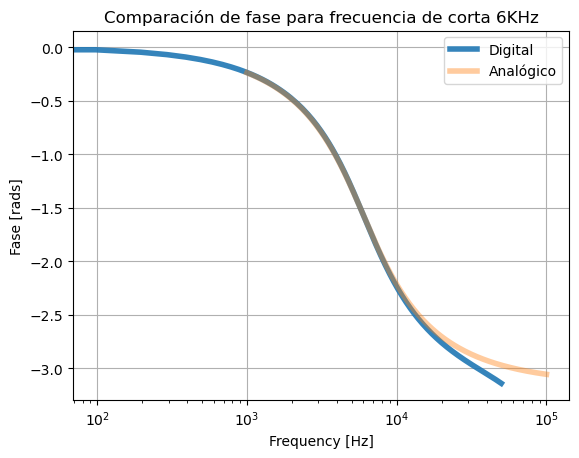

In [7]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import derivative

fs = 100E3
fc = 6E3
order = 2

plt.figure()
b, a  = signal.butter(order, fc, 'lp',  fs=fs,output='ba', analog=False)
w_digital, h_digital = signal.freqz(b, a, fs=fs)
plt.semilogx(w_digital, 20 * np.log10(abs(h_digital)),label='Digital', linewidth=4, alpha=0.9)

b, a  = signal.butter(order, fc, 'lp',output='ba', analog=True)
w_analog, h_analog = signal.freqs(b, a)
plt.semilogx(w_analog, 20 * np.log10(abs(h_analog)),label='Analógico', linewidth=4, alpha=0.4)

plt.xlim(fc/10, fc*10)     # set the xlim to left, right
plt.ylim(-40,10)     # set the xlim to left, right

plt.title('Comparación para frecuencia de corta 6KHz')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.legend()
plt.grid()

plt.show()

# Plot de ángulos

plt.figure()

plt.semilogx(w_digital, np.angle(h_digital),label='Digital', linewidth=4, alpha=0.9)
plt.semilogx(w_analog, np.angle(h_analog),label='Analógico', linewidth=4, alpha=0.4)

plt.title('Comparación de fase para frecuencia de corta 6KHz')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Fase [rads]')
plt.legend()
plt.grid()

plt.show()
